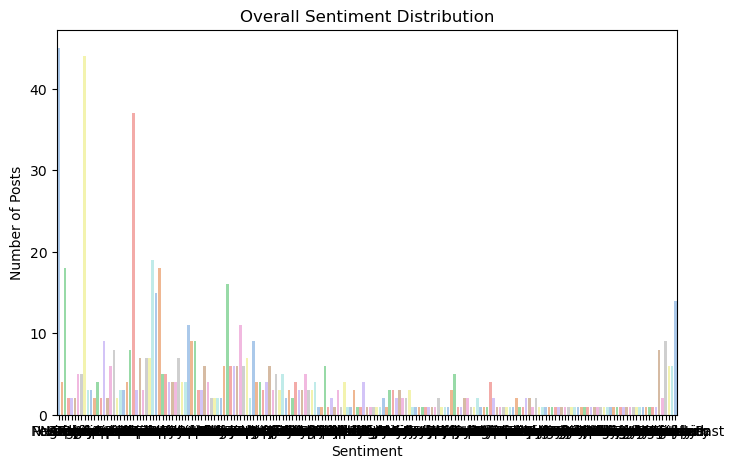

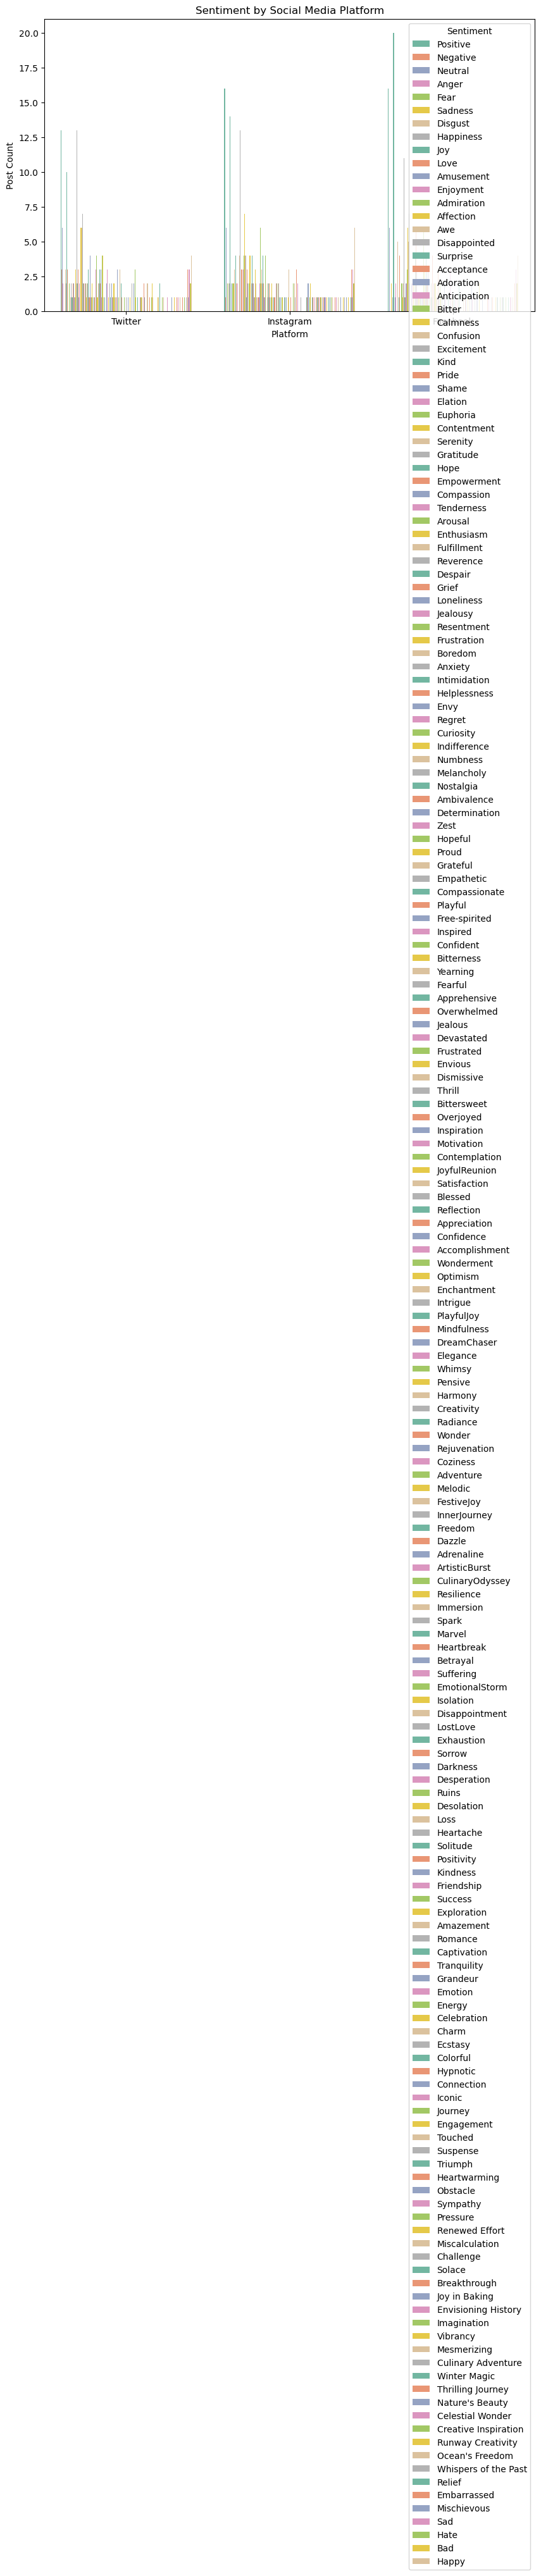

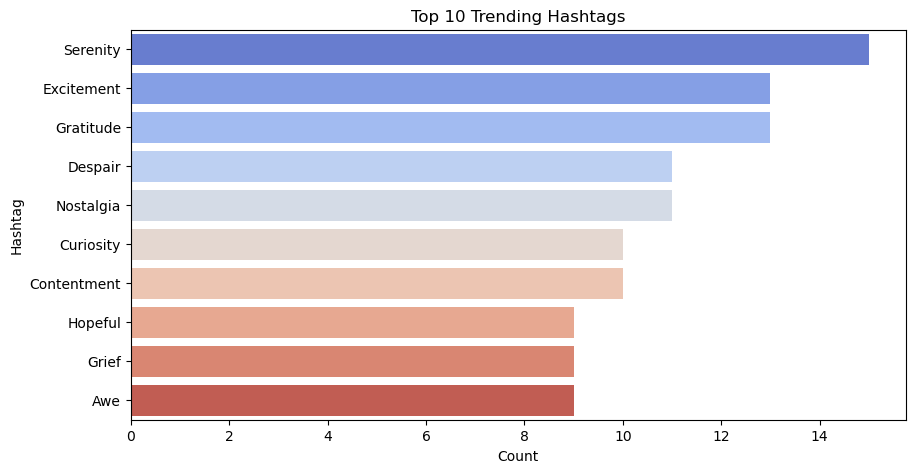

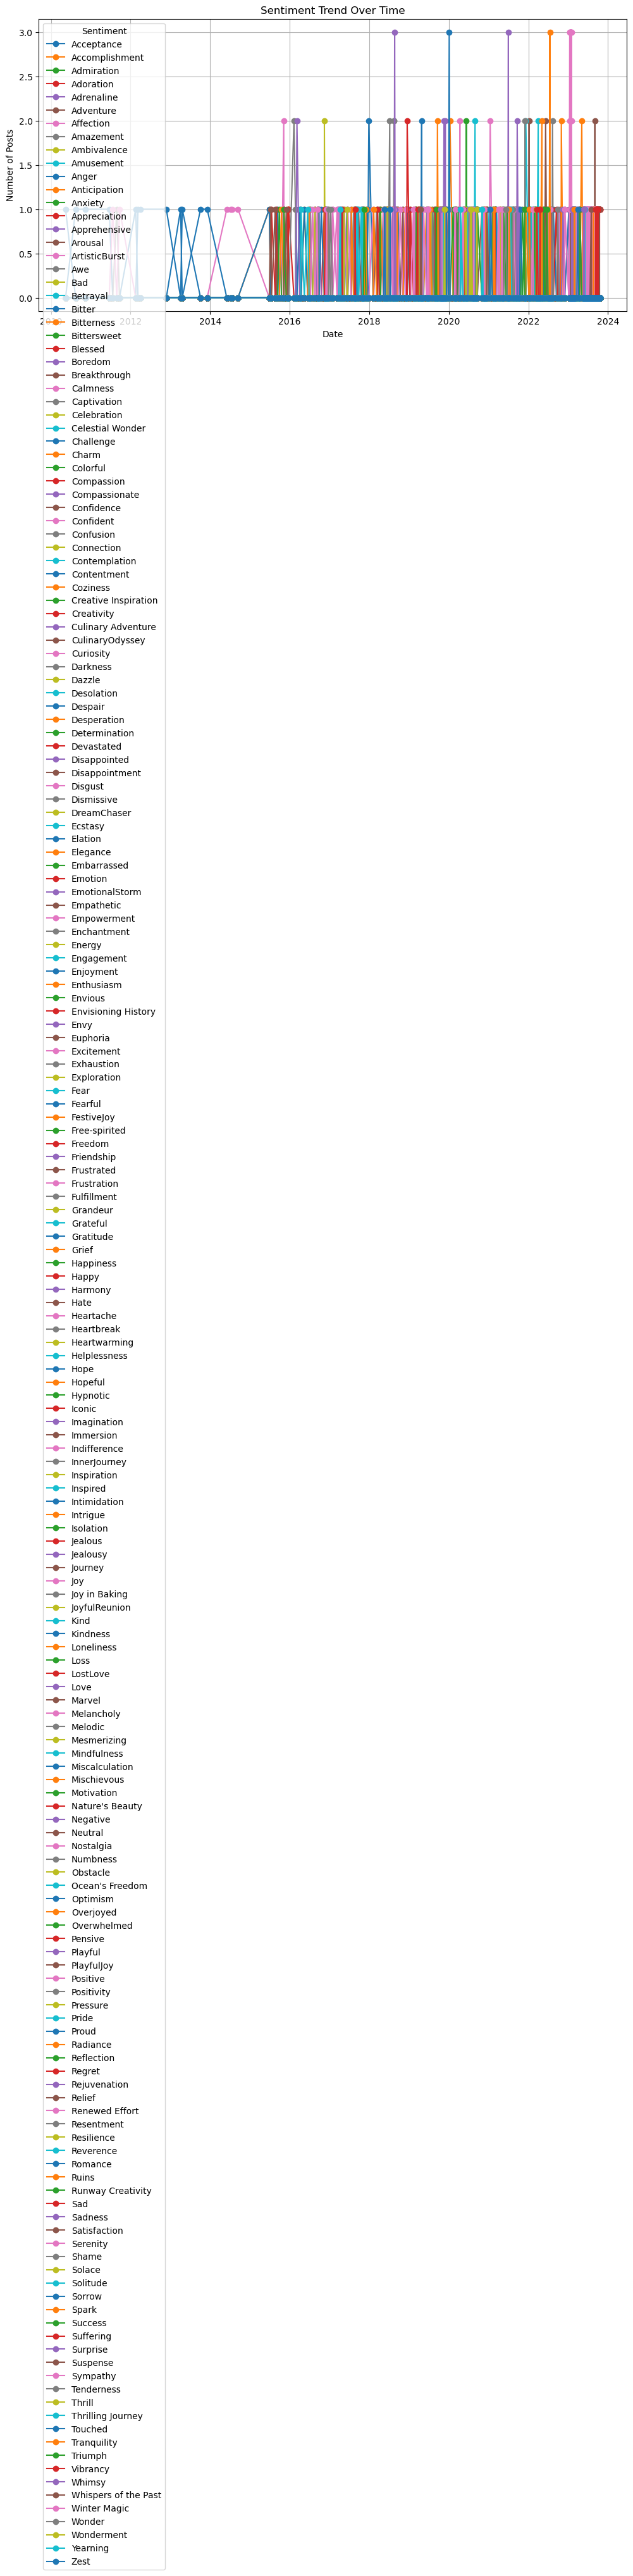

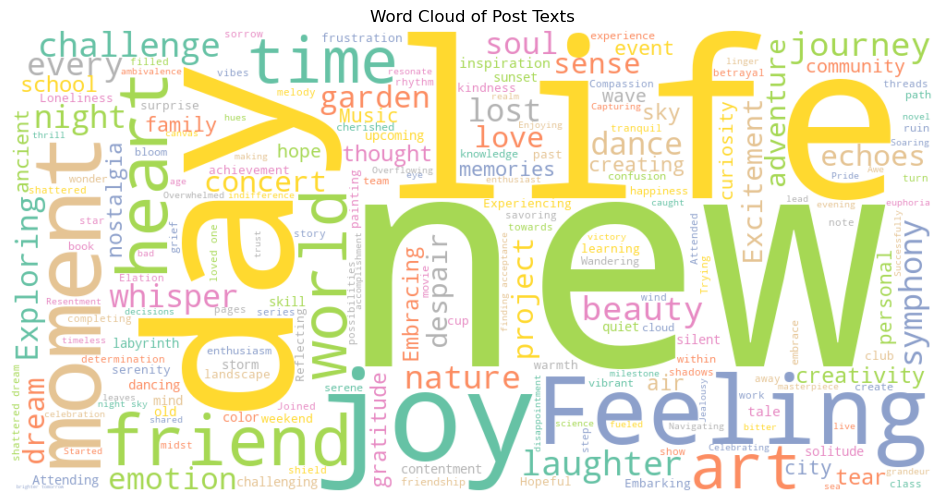

✅ Exported summary to 'sentiment_summary.xlsx'


In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
file_path = 'sentimentdataset.csv'  # Update this path if needed
df = pd.read_csv(file_path)

# Drop extra unnamed columns
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col], errors='ignore')

# Strip whitespace from key fields
df['Sentiment'] = df['Sentiment'].str.strip()
df['Platform'] = df['Platform'].str.strip()

# --- 1. Sentiment Distribution ---
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment', hue='Sentiment', palette='pastel', legend=False, ax=ax)
ax.set_title("Overall Sentiment Distribution")
ax.set_xlabel("Sentiment")
ax.set_ylabel("Number of Posts")
plt.show()

# --- 2. Sentiment by Platform ---
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x='Platform', hue='Sentiment', palette='Set2', ax=ax)
ax.set_title("Sentiment by Social Media Platform")
ax.set_xlabel("Platform")
ax.set_ylabel("Post Count")
ax.legend(title="Sentiment")
plt.show()

# --- 3. Top Trending Hashtags ---
hashtags_series = df['Hashtags'].str.replace('#', '', regex=False).str.split()
hashtags_flat = [tag for sublist in hashtags_series.dropna() for tag in sublist]
hashtags_df = pd.DataFrame(hashtags_flat, columns=['Hashtag'])
top_hashtags = hashtags_df['Hashtag'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x=top_hashtags.values,
    y=top_hashtags.index,
    hue=top_hashtags.index,
    palette='coolwarm',
    legend=False,
    ax=ax
)
ax.set_title("Top 10 Trending Hashtags")
ax.set_xlabel("Count")
ax.set_ylabel("Hashtag")
plt.subplots_adjust(bottom=0.25, top=0.9)
plt.show()

# --- 4. Sentiment Trend Over Time ---
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Date'] = df['Timestamp'].dt.date
sentiment_over_time = df.groupby(['Date', 'Sentiment']).size().unstack().fillna(0)

fig, ax = plt.subplots(figsize=(12, 6))
sentiment_over_time.plot(marker='o', ax=ax)
ax.set_title("Sentiment Trend Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Posts")
ax.grid(True)
plt.show()

# --- 5. Word Cloud of All Posts ---
all_text = ' '.join(df['Text'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='Set2').generate(all_text)

fig, ax = plt.subplots(figsize=(12, 6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
ax.set_title("Word Cloud of Post Texts")
plt.show()

# --- 6. Export Summary for Power BI / Excel ---
summary = df.groupby(['Platform', 'Sentiment']).agg({
    'Text': 'count',
    'Likes': 'sum',
    'Retweets': 'sum'
}).rename(columns={'Text': 'Post_Count'}).reset_index()

summary.to_excel("sentiment_summary.xlsx", index=False)
print("✅ Exported summary to 'sentiment_summary.xlsx'")
